# 월드컵 데이터 분석
- data 출처 : https://www.kaggle.com/abecklas/fifa-world-cup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
data = pd.read_csv('./WorldCups.csv',decimal=',')
data.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


### 역대 관중 수 출력하기.
- Year, Attendance col 출력

In [9]:
df = data[['Year','Attendance']]
df['Attendance']  = df['Attendance'].astype(str)
df['Attendance'] = df['Attendance'].apply(lambda x : x.replace('.','')).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        20 non-null     int64
 1   Attendance  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


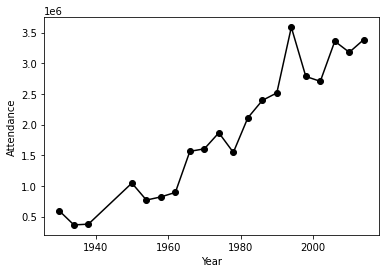

In [10]:
fig, ax = plt.subplots()
ax.plot(df['Year'],df['Attendance'],marker = 'o',color ='k')
ax.set_xlabel('Year')
ax.set_ylabel('Attendance')
fig.show()

### 경기당 득점 수 분석

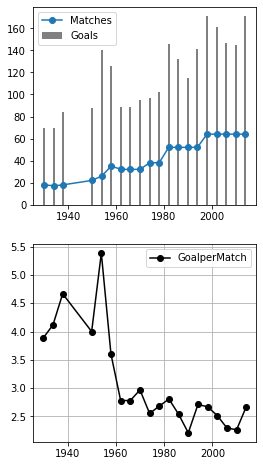

In [18]:
data['Goalpermatch'] = data['GoalsScored'] / data['MatchesPlayed']
fig ,axes = plt.subplots(2,1,figsize=(4,8))
axes[0].bar(data['Year'],data['GoalsScored'],color='grey',label='Goals')
axes[0].plot(data['Year'],data['MatchesPlayed'],marker='o',label='Matches')
axes[0].legend()

axes[1].plot(data['Year'],data['Goalpermatch'],'k-o',label='GoalperMatch')
axes[1].legend()
axes[1].grid(True)
fig.show()